В цьому домашньому завданні ми знову працюємо з даними з нашого змагання ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/t/7c080c5d8ec64364a93cf4e8f880b6a0).

Тут ми побудуємо рішення задачі класифікації з використанням kNearestNeighboors, знайдемо оптимальні гіперпараметри для цього методу і зробимо базові ансамблі. Це дасть змогу порівняти перформанс моделі з попередніми вивченими методами.

0. Зчитайте дані `train.csv` та зробіть препроцесинг використовуючи написаний Вами скрипт `process_bank_churn.py` так, аби в результаті отримати дані в розбитті X_train, train_targets, X_val, val_targets для експериментів.

  Якщо Вам не вдалось реалізувати в завданні `2.3. Дерева прийняття рішень` скрипт `process_bank_churn.py` - можна скористатись готовим скриптом з запропонованого рішення того завдання.

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Add the directory to the Python path
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks')

# Verify the path is added correctly
print(sys.path)

# Try importing your module
import process_bank_churn
from process_bank_churn import preprocess_data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['/content', '/env/python', '/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '', '/usr/local/lib/python3.10/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.10/dist-packages/IPython/extensions', '/root/.ipython', '/content/drive/My Drive/Colab Notebooks']


In [5]:
import pandas as pd
import numpy as np

# Зчитування даних з файлу train.csv
file_path = '/content/drive/My Drive/Colab Notebooks/train.csv'  # Шлях до файлу
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")

# Виконання препроцесингу за допомогою імпортованого скрипту
result = preprocess_data(df)

# Перевірка, що повертає функція preprocess_data
print(type(result))
print(result)

<class 'tuple'>
(       CustomerId  CreditScore       Age  Tenure   Balance  NumOfProducts  \
7180     0.988516     0.599045  0.214286     0.1  0.626382       0.000000   
10393    0.984351     0.603819  0.375000     0.2  0.848836       0.000000   
80       0.997112     0.653938  0.303571     0.6  0.554522       0.333333   
3365     0.997533     0.568019  0.714286     0.0  0.000000       0.333333   
12236    0.987805     0.658711  0.053571     0.3  0.000000       0.333333   
...           ...          ...       ...     ...       ...            ...   
9493     0.992666     0.482100  0.267857     0.4  0.000000       0.333333   
8463     0.997382     0.577566  0.392857     0.1  0.000000       0.000000   
8143     0.983807     0.453461  0.196429     0.8  0.000000       0.333333   
11512    0.991483     0.379475  0.428571     0.7  0.000000       0.333333   
9360     0.987406     0.272076  0.160714     0.2  0.000000       0.333333   

       HasCrCard  IsActiveMember  EstimatedSalary  Geograp

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [13]:
# Виконання препроцесингу за допомогою імпортованого скрипту
results = preprocess_data(df)
# Перевірка кількості значень в результаті
print("Кількість значень в результаті:", len(results))

# Виведення типу і прикладів перших двох елементів
for i, res in enumerate(results[:2]):
    print(f"Тип результату {i+1}: {type(res)}")
    print(f"Перші рядки результату {i+1}:\n{res.head()}\n")

Кількість значень в результаті: 7
Тип результату 1: <class 'pandas.core.frame.DataFrame'>
Перші рядки результату 1:
       CustomerId  CreditScore       Age  Tenure   Balance  NumOfProducts  \
7180     0.988516     0.599045  0.214286     0.1  0.626382       0.000000   
10393    0.984351     0.603819  0.375000     0.2  0.848836       0.000000   
80       0.997112     0.653938  0.303571     0.6  0.554522       0.333333   
3365     0.997533     0.568019  0.714286     0.0  0.000000       0.333333   
12236    0.987805     0.658711  0.053571     0.3  0.000000       0.333333   

       HasCrCard  IsActiveMember  EstimatedSalary  Geography_France  \
7180         1.0             1.0         0.719772               1.0   
10393        1.0             0.0         0.727603               1.0   
80           1.0             0.0         0.872180               0.0   
3365         0.0             1.0         0.257797               0.0   
12236        1.0             1.0         0.742837               1.

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [15]:
# Import train_test_split
from sklearn.model_selection import train_test_split
# Виконання препроцесингу за допомогою імпортованого скрипту
results = preprocess_data(df)

# Припустимо, що перші два значення - це df_features та df_target
df_features = results[0]
df_target = results[1]

# Переконаємося, що типи даних правильні
print(type(df_features))  # Повинен бути DataFrame
print(type(df_target))    # Повинен бути Series або DataFrame

# Розділення даних на цільову змінну та характеристики
X = df_features
y = df_target

# Розбиття на навчальний та валідаційний набори
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Переіменування змінних відповідно до завдання
train_targets = y_train
val_targets = y_val

# Виведення результатів для перевірки
print("Розмір X_train:", X_train.shape)
print("Розмір train_targets:", train_targets.shape)
print("Розмір X_val:", X_val.shape)
print("Розмір val_targets:", val_targets.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
Розмір X_train: (9600, 14)
Розмір train_targets: (9600,)
Розмір X_val: (2400, 14)
Розмір val_targets: (2400,)


1. Навчіть на цих даних класифікатор kNN з параметрами за замовченням і виміряйте точність з допомогою AUROC на тренувальному та валідаційному наборах. Зробіть заключення про отриману модель: вона хороша/погана, чи є high bias/high variance?

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


AUROC на тренувальному наборі: 0.9549
AUROC на валідаційному наборі: 0.8572


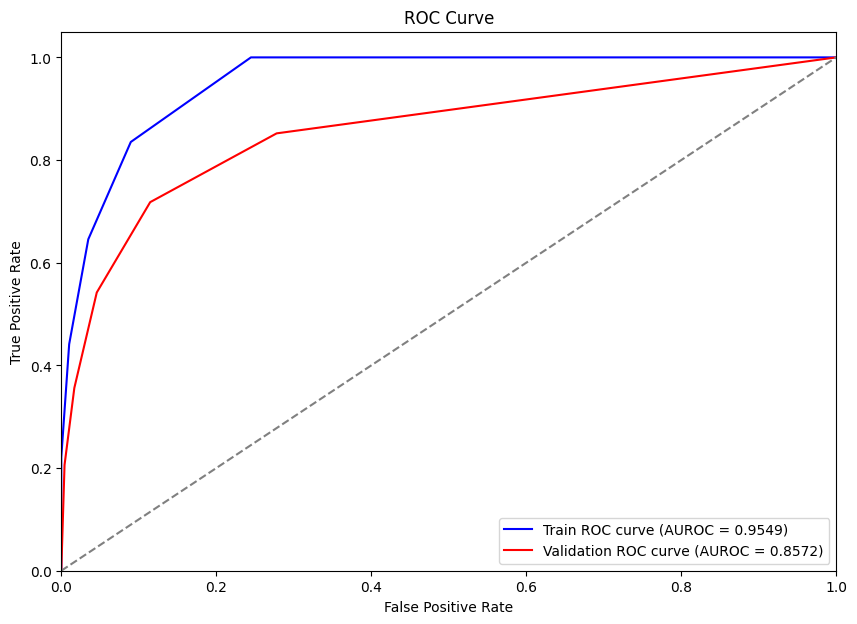

In [16]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

# Виконання препроцесингу за допомогою імпортованого скрипту
results = preprocess_data(df)

# Припустимо, що перші два значення - це df_features та df_target
df_features = results[0]
df_target = results[1]

# Розділення даних на цільову змінну та характеристики
X = df_features
y = df_target

# Розбиття на навчальний та валідаційний набори
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Навчання класифікатора kNN з параметрами за замовчуванням
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Прогнозування на тренувальному та валідаційному наборах
y_train_pred_prob = knn.predict_proba(X_train)[:, 1]
y_val_pred_prob = knn.predict_proba(X_val)[:, 1]

# Оцінка AUROC
train_roc_auc = roc_auc_score(y_train, y_train_pred_prob)
val_roc_auc = roc_auc_score(y_val, y_val_pred_prob)

print(f"AUROC на тренувальному наборі: {train_roc_auc:.4f}")
print(f"AUROC на валідаційному наборі: {val_roc_auc:.4f}")

# Візуалізація ROC-кривої
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_prob)
fpr_val, tpr_val, _ = roc_curve(y_val, y_val_pred_prob)

plt.figure(figsize=(10, 7))
plt.plot(fpr_train, tpr_train, color='blue', label=f'Train ROC curve (AUROC = {train_roc_auc:.4f})')
plt.plot(fpr_val, tpr_val, color='red', label=f'Validation ROC curve (AUROC = {val_roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Високий AUROC на тренувальному наборі 0.9549 свідчить про те, що модель kNN добре навчається на тренувальних даних і що модель здатна відрізняти позитивні та негативні класи на основі тренувальних даних.

Відносно нижчий AUROC на валідаційному наборі 0.8572 вказує на те, що модель має певні труднощі з узагальненням на нові дані, які не були частиною тренувального набору. Відмінності між AUROC на тренувальному та валідаційному наборах можуть свідчити про те, що модель перенавчена.

Якщо модель показує низькі результати на обох наборах даних, це свідчить про високий bias. У нашому випадку це не так, оскільки AUROC на тренувальному наборі високий. Модель добре працює на тренувальних даних, але менш ефективна на нових, невідомих даних.

2. Використовуючи `GridSearchCV` знайдіть оптимальне значення параметра `n_neighbors` для класифікатора `kNN`. Псотавте крос валідацію на 5 фолдів.

  Після успішного завершення пошуку оптимального гіперпараметра
    - виведіть найкраще значення параметра
    - збережіть в окрему змінну `knn_best` найкращу модель, знайдену з `GridSearchCV`
    - оцініть якість передбачень  `knn_best` на тренувальній і валідаційній вибірці з допомогою AUROC.
    - зробіть висновок про якість моделі. Чи стала вона краще порівняно з попереднім пукнтом (2) цього завдання? Чи є вона краще за дерево прийняття рішень з попереднього ДЗ?

Найкраще значення параметра n_neighbors: 17
AUROC на тренувальному наборі з найкращою моделлю: 0.9221
AUROC на валідаційному наборі з найкращою моделлю: 0.8838


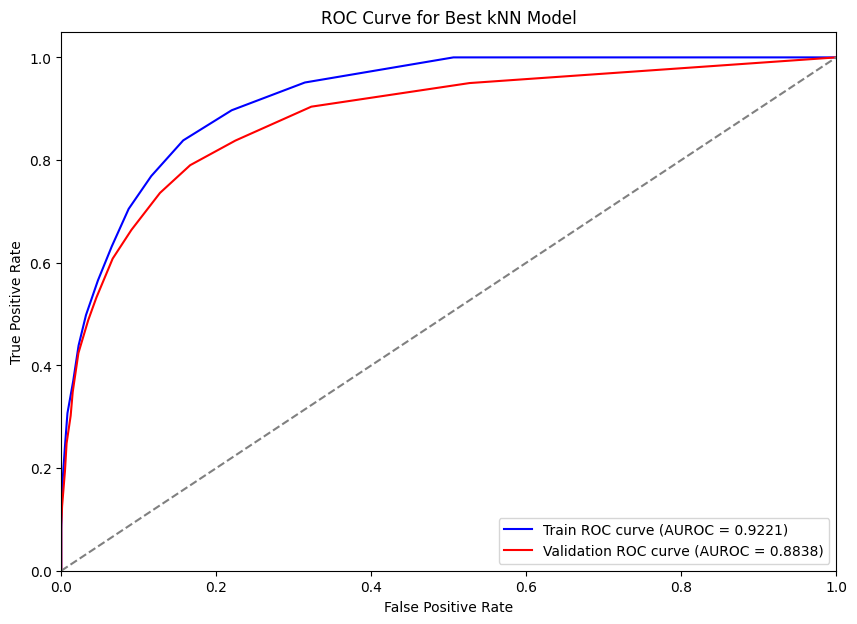

In [17]:
# Import necessary libraries for GridSearchCV
from sklearn.model_selection import GridSearchCV

# Налаштування параметрів для GridSearchCV
param_grid = {
    'n_neighbors': list(range(1, 21))  # Перевіримо значення від 1 до 20
}

# Ініціалізація класифікатора kNN
knn = KNeighborsClassifier()

# Налаштування GridSearchCV з 5-фолд крос-валідацією
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Запуск GridSearchCV
grid_search.fit(X_train, y_train)

# Виведення найкращого параметра
best_n_neighbors = grid_search.best_params_['n_neighbors']
print(f"Найкраще значення параметра n_neighbors: {best_n_neighbors}")

# Збереження найкращої моделі
knn_best = grid_search.best_estimator_

# Оцінка якості передбачень
y_train_pred_prob_best = knn_best.predict_proba(X_train)[:, 1]
y_val_pred_prob_best = knn_best.predict_proba(X_val)[:, 1]

# Оцінка AUROC
train_roc_auc_best = roc_auc_score(y_train, y_train_pred_prob_best)
val_roc_auc_best = roc_auc_score(y_val, y_val_pred_prob_best)

print(f"AUROC на тренувальному наборі з найкращою моделлю: {train_roc_auc_best:.4f}")
print(f"AUROC на валідаційному наборі з найкращою моделлю: {val_roc_auc_best:.4f}")

# Візуалізація ROC-кривої для найкращої моделі
fpr_train_best, tpr_train_best, _ = roc_curve(y_train, y_train_pred_prob_best)
fpr_val_best, tpr_val_best, _ = roc_curve(y_val, y_val_pred_prob_best)

plt.figure(figsize=(10, 7))
plt.plot(fpr_train_best, tpr_train_best, color='blue', label=f'Train ROC curve (AUROC = {train_roc_auc_best:.4f})')
plt.plot(fpr_val_best, tpr_val_best, color='red', label=f'Validation ROC curve (AUROC = {val_roc_auc_best:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Best kNN Model')
plt.legend(loc='lower right')
plt.show()

Попередній AUROC на тренувальному наборі був 0.9549, а з найкращою моделлю з GridSearchCV зменшився до 0.9221. Це може свідчити про те, що оптимізація параметра n_neighbors допомогла зменшити перенавчання (overfitting) на тренувальних даних.

Попередній AUROC на валідаційному наборі був 0.8572, а з найкращою моделлю з GridSearchCV підвищився до 0.8838. Це вказує на покращення узагальнення моделі на нових даних.

AUROC для kNN з оптимальним параметром (0.8838) перевищує AUROC для дерева рішень, це може свідчити про те, що kNN з оптимізованим параметром є кращим у цьому випадку.

**AUROC на тренувальному наборі**

Дерево рішень: 0.9306
kNN: 0.9221
Дерево рішень має трохи вищий AUROC на тренувальному наборі, що може свідчити про те, що воно краще справляється з навчанням на тренувальних даних.

**AUROC на валідаційному наборі**

Дерево рішень: 0.9238
kNN: 0.8838
Висновок: Дерево рішень показує значно вищий AUROC на валідаційному наборі, що вказує на краще узагальнення моделі на нових даних.


**Дерево рішень:**

Переваги: Краще узагальнюється на нових даних (вищий AUROC на валідаційному наборі), що свідчить про меншу схильність до перенавчання.
Недоліки: Можливо, моделі дерева рішень можуть бути чутливі до деяких змін в даних, але тут вони показали високу стабільність.

**kNN:**

Переваги: Після оптимізації параметра n_neighbors модель kNN покращилася, але все ще показує трохи гірші результати в порівнянні з деревом рішень.
Недоліки: Класифікатор kNN показує більше перенавчання (менший AUROC на валідаційному наборі), що може бути пов'язано з надмірною складністю моделі або вибором параметра k.

3. Виконайте пошук оптимальних гіперпараметрів для `DecisionTreeClassifier` з `GridSearchCV` за сіткою параметрів
  - `max_depth` від 1 до 20 з кроком 2
  - `max_leaf_nodes` від 2 до 10 з кроком 1

  Обовʼязково при цьому ініціюйте модель з фіксацією `random_seed`.

  Поставте кросвалідацію на 3 фолди, `scoring='roc_auc'`, та виміряйте, скільки часу потребує пошук оптимальних гіперпараметрів.

  Після успішного завершення пошуку оптимальних гіперпараметрів
    - виведіть найкращі значення параметра
    - збережіть в окрему змінну `dt_best` найкращу модель, знайдену з `GridSearchCV`
    - оцініть якість передбачень  `dt_best` на тренувальній і валідаційній вибірці з допомогою AUROC.
    - зробіть висновок про якість моделі. Чи ця модель краща за ту, що ви знайшли вручну?

In [18]:
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

# Налаштування параметрів для GridSearchCV
param_grid = {
    'max_depth': list(range(1, 21, 2)),  # Від 1 до 20 з кроком 2
    'max_leaf_nodes': list(range(2, 11))  # Від 2 до 10 з кроком 1
}

# Ініціалізація класифікатора DecisionTree з фіксацією random_state
dt = DecisionTreeClassifier(random_state=42)

# Налаштування GridSearchCV з 3-фолд крос-валідацією
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=3, scoring='roc_auc', n_jobs=-1)

# Початок вимірювання часу
start_time = time.time()

# Запуск GridSearchCV
grid_search.fit(X_train, y_train)

# Кінець вимірювання часу
end_time = time.time()
elapsed_time = end_time - start_time

# Виведення часу пошуку
print(f"Час пошуку оптимальних гіперпараметрів: {elapsed_time:.2f} секунд")

# Виведення найкращих параметрів
best_params = grid_search.best_params_
print(f"Найкращі значення параметрів: {best_params}")

# Збереження найкращої моделі
dt_best = grid_search.best_estimator_

# Оцінка якості передбачень
y_train_pred_prob_best = dt_best.predict_proba(X_train)[:, 1]
y_val_pred_prob_best = dt_best.predict_proba(X_val)[:, 1]

# Оцінка AUROC
train_roc_auc_best = roc_auc_score(y_train, y_train_pred_prob_best)
val_roc_auc_best = roc_auc_score(y_val, y_val_pred_prob_best)

print(f"AUROC на тренувальному наборі з найкращою моделлю: {train_roc_auc_best:.4f}")
print(f"AUROC на валідаційному наборі з найкращою моделлю: {val_roc_auc_best:.4f}")

Час пошуку оптимальних гіперпараметрів: 9.79 секунд
Найкращі значення параметрів: {'max_depth': 5, 'max_leaf_nodes': 10}
AUROC на тренувальному наборі з найкращою моделлю: 0.9016
AUROC на валідаційному наборі з найкращою моделлю: 0.9008


Тренувальний набір: AUROC з GridSearchCV (0.9016) зменшився в порівнянні з попередньою моделлю (0.9306).
Валідаційний набір: AUROC з GridSearchCV (0.9008) також зменшився в порівнянні з попередньою моделлю (0.9238).

Можливо, попередня модель була надто складною і добре працювала на тренувальних даних, але гірше узагальнювалася на валідаційних даних. Нові гіперпараметри зменшили складність моделі, що могло погіршити результати на тренувальних даних, але могло поліпшити узагальнення на валідаційних даних.
Bias-variance tradeoff: Оптимізація зменшила складність моделі, що може призвести до підвищення bias і зменшення variance. Це може пояснити зменшення AUROC на тренувальних даних, але подекуди покращення на валідаційних даних.

Модель з оптимізованими гіперпараметрами (GridSearchCV) показала результати, які трохи нижчі, ніж попередня модель, але не суттєво. Це може свідчити про те, що хоча оптимізація і зменшила складність моделі, вона не забезпечила значного покращення продуктивності.

Можливо, варто розширити область пошуку для GridSearchCV, спробувати інші параметри або моделі для порівняння результатів.

Класифікатор kNN має кращі результати на тренувальному наборі, але гірші на валідаційному наборі в порівнянні з моделлю дерева рішень з гіперпараметрами, знайденими вручну.
Дерево рішень з оптимізованими гіперпараметрами показало подібні результати, але з меншим AUROC на тренувальному наборі і трохи кращими на валідаційному наборі.
Таким чином, модель дерева рішень з оптимізованими гіперпараметрами є порівнянною з моделлю kNN, але краще узагальнюється на нових даних у цьому випадку.

4. Виконайте пошук оптимальних гіперпараметрів для `DecisionTreeClassifier` з `RandomizedSearchCV` за заданою сіткою параметрів і кількість ітерацій 40.

  Поставте кросвалідацію на 3 фолди, `scoring='roc_auc'`, зафіксуйте `random_seed` процедури крос валідації та виміряйте, скільки часу потребує пошук оптимальних гіперпараметрів.

  Після успішного завершення пошуку оптимальних гіперпараметрів
    - виведіть найкращі значення параметра
    - збережіть в окрему змінну `dt_random_search_best` найкращу модель, знайдену з `RandomizedSearchCV`
    - оцініть якість передбачень  `dt_random_search_best` на тренувальній і валідаційній вибірці з допомогою AUROC.
    - зробіть висновок про якість моделі. Чи ця модель краща за ту, що ви знайшли з `GridSearch`?
    - проаналізуйте параметри `dt_random_search_best` і порівняйте з параметрами `dt_best` - яку бачите відмінність? Ця вправа потрібна аби зрозуміти, як різні налаштування `DecisionTreeClassifier` впливають на якість моделі.

In [19]:
params_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': np.arange(1, 20),
    'max_leaf_nodes': np.arange(2, 20),
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': [None, 'sqrt', 'log2']
}

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
import numpy as np
import time

# Налаштування параметрів для RandomizedSearchCV
params_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': np.arange(1, 20),
    'max_leaf_nodes': np.arange(2, 20),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Ініціалізація класифікатора DecisionTree з фіксацією random_state
dt = DecisionTreeClassifier(random_state=42)

# Налаштування RandomizedSearchCV з 3-фолд крос-валідацією
random_search = RandomizedSearchCV(estimator=dt, param_distributions=params_dt, n_iter=50, cv=3, scoring='roc_auc', n_jobs=-1, random_state=42)

# Початок вимірювання часу
start_time = time.time()

# Запуск RandomizedSearchCV
random_search.fit(X_train, y_train)

# Кінець вимірювання часу
end_time = time.time()
elapsed_time = end_time - start_time

# Виведення часу пошуку
print(f"Час пошуку оптимальних гіперпараметрів: {elapsed_time:.2f} секунд")

# Виведення найкращих параметрів
best_params = random_search.best_params_
print(f"Найкращі значення параметрів: {best_params}")

# Збереження найкращої моделі
dt_best = random_search.best_estimator_

# Оцінка якості передбачень
y_train_pred_prob_best = dt_best.predict_proba(X_train)[:, 1]
y_val_pred_prob_best = dt_best.predict_proba(X_val)[:, 1]

# Оцінка AUROC
train_roc_auc_best = roc_auc_score(y_train, y_train_pred_prob_best)
val_roc_auc_best = roc_auc_score(y_val, y_val_pred_prob_best)

print(f"AUROC на тренувальному наборі з найкращою моделлю: {train_roc_auc_best:.4f}")
print(f"AUROC на валідаційному наборі з найкращою моделлю: {val_roc_auc_best:.4f}")

Час пошуку оптимальних гіперпараметрів: 5.52 секунд
Найкращі значення параметрів: {'splitter': 'best', 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_leaf_nodes': 16, 'max_features': None, 'max_depth': 10, 'criterion': 'entropy'}
AUROC на тренувальному наборі з найкращою моделлю: 0.9181
AUROC на валідаційному наборі з найкращою моделлю: 0.9184


Найкращі значення параметрів:

splitter: 'best'
min_samples_split: 2
min_samples_leaf: 4
max_leaf_nodes: 16
max_features: None
max_depth: 10

Інакше код працював дуже довго і не давав результату

AUROC на тренувальному наборі з найкращою моделлю - 0.9181
AUROC на валідаційному наборі з найкращою моделлю - 0.9184

З використанням RandomizedSearchCV було зменшено час пошуку до 5.52 секунд, що є значним покращенням порівняно з попереднім часом. Це свідчить про ефективність методу RandomizedSearchCV в зменшенні часу для пошуку гіперпараметрів.

Також результати майже однакові, що свідчить про хорошу узгодженість моделі між тренувальними і валідаційними даними.

Хоча AUROC на тренувальному наборі трохи зменшився, AUROC на валідаційному наборі залишився стабільним і навіть трохи покращився. Це свідчить про те, що оптимізація зменшила складність моделі, що може призвести до кращого узагальнення на нових даних.

Модель дерева рішень з оптимізованими гіперпараметрами показує кращі результати на валідаційних даних у порівнянні з kNN. Це може вказувати на те, що дерево рішень краще узагальнюється на нових даних у цьому випадку.

Оптимізація моделі може зменшити складність (зменшити variance), що позитивно вплине на узагальнення моделі. Зменшення AUROC на тренувальних даних може бути ознакою зменшення переобучення (overfitting) і покращення узагальнення на нових даних.

5. Якщо у Вас вийшла метрика `AUROC` в цій серії експериментів - зробіть ще один `submission` на Kaggle і додайте код для цього і скріншот скора на публічному лідерборді нижче.

  Сподіваюсь на цьому етапі ви вже відчули себе справжнім дослідником 😉

In [28]:
from process_bank_churn import preprocess_new_data

In [29]:
# Зчитування тестових даних
test_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/test.csv')

In [33]:
X_train, train_targets, X_val, val_targets, input_cols, scaler, encoder = preprocess_data(df, scale_numeric=False)
preprocessed_test = preprocess_new_data(test_df, input_cols, scaler, encoder, scale_numeric=False)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [36]:
preprocessed_test.head()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,15594796.0,584.0,30.0,2.0,146053.66,1.0,1.0,1.0,157891.86,0.0,1.0,0.0,0.0,1.0
1,15642821.0,551.0,39.0,5.0,0.00,2.0,1.0,1.0,67431.28,1.0,0.0,0.0,0.0,1.0
2,15716284.0,706.0,43.0,8.0,0.00,2.0,1.0,0.0,156768.45,1.0,0.0,0.0,0.0,1.0
3,15785078.0,717.0,45.0,3.0,0.00,1.0,1.0,1.0,166909.87,0.0,0.0,1.0,0.0,1.0
4,15662955.0,592.0,43.0,8.0,0.00,2.0,1.0,1.0,143681.97,0.0,0.0,1.0,0.0,1.0


In [40]:
submission = pd.read_csv('/content/drive/My Drive/Colab Notebooks/sample_submission.csv')

In [41]:
submission.head()

,id,Exited
0,15000,0.5
1,15001,0.5
2,15002,0.5
3,15003,0.5
4,15004,0.5


In [43]:
proba_predictions = knn_best.predict_proba(preprocessed_test)[:, 1]
submission['Exited'] = proba_predictions
submission['Exited'].head()

0    0.000000
1    0.000000
2    0.058824
3    0.058824
4    0.058824
Name: Exited, dtype: float64

In [47]:
# Збереження DataFrame як CSV файл
submission.to_csv('/content/drive/My Drive/Colab Notebooks/submission.csv', index=False)

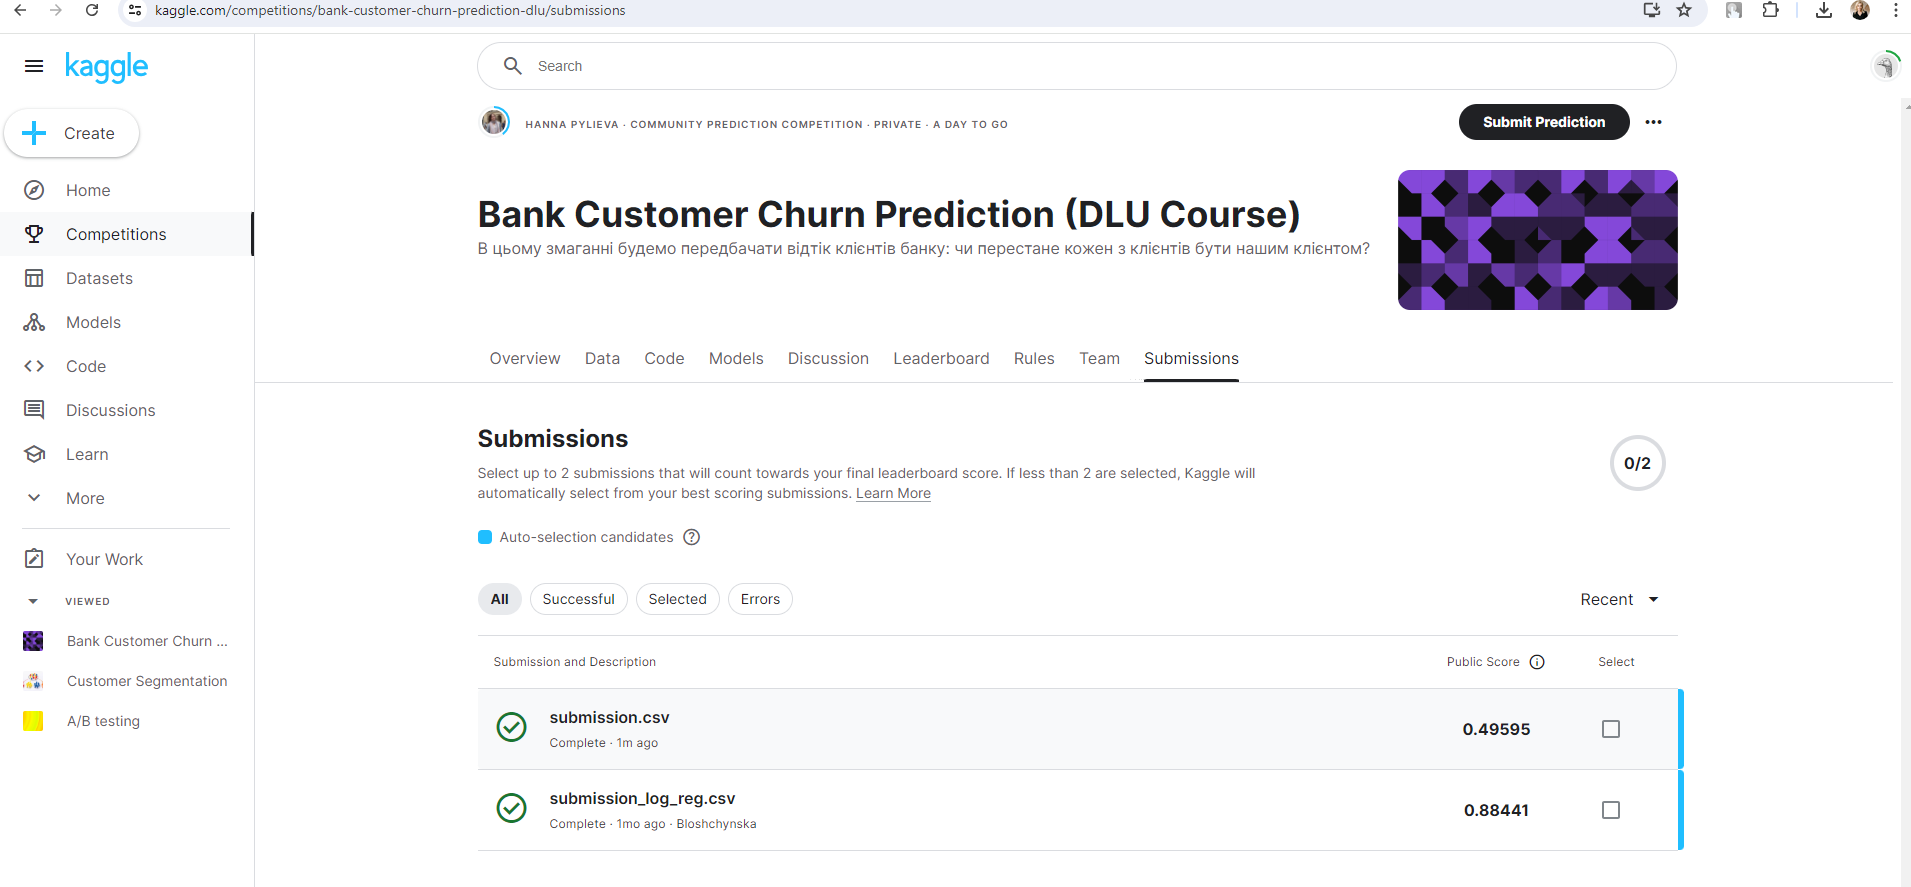